In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

x,J -> 3.0347523507369147 -2.2463065055152605


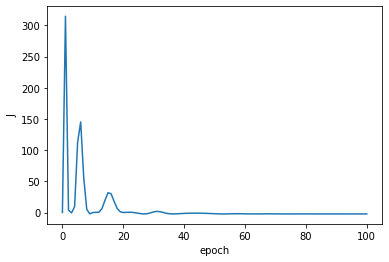

In [2]:
###############################################
#2. EXPLORING ADAPTIVE LEARNING RATES
#
# Implementing ADAM Learning Rate from scratch
###############################################


epochs=100
x=0.2
l_rate=5
delta=10**-8

#decay rates
p1=0.9 
p2=0.999 

#accumulators
s=0
r=0

J=[]
J_temp=((1/4)*x**4-(4/3)*x**3+(3/2)*x**2)
J.append(J_temp)
    
for i in range(1,(epochs+1)): #for 100 iterations
    
    #compute gradient descent
    g_x=(x**3)-(4*x**2)+(3*x)
    
    #update 1st (s) and 2nd (r) moments
    s=p1*s + (1-p1)*g_x 
    r=p2*r + (1-p2)*(g_x**2)
    
    #compute bias corrected 1st and 2nd moment estimates
    s_bc=s/(1-p1**i)
    r_bc=r/(1-p2**i)
    
    x-=l_rate*(s_bc/(math.sqrt(r_bc)+delta))

    #compute current J after ea epoch
    J_temp=(1/4)*x**4-(4/3)*x**3+(3/2)*x**2
    J.append(round(J_temp,3))


print("x,J ->", x,J_temp)

#plot epoch v J
fig, axes = plt.subplots()
axes.plot(np.arange(0,101,1),J) 
axes.set_xlabel('epoch')
axes.set_ylabel('J')
plt.show() 

epoch vs J ->


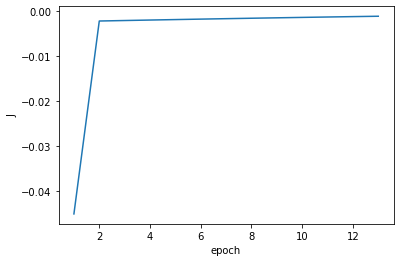

True positives = 2115 out of 2115 test samples.
My model classified 100.00% of test samples correcly.


In [3]:
########################
#3. LOGISTIC REGRESSION
########################

def get_data(f):
    '''Reads csv file, converts to numpy array, returns only class 0 and 1 samples'''

    df=pd.read_csv(f)
    d=df.values
    d=np.asarray(d)

    #boolean mask to only keep samples from class 0 and 1
    zeros=d[d[:,0] == 0]
    ones=d[d[:,0] == 1]
    d=np.append(zeros, ones, axis=0)
    
    return d

def randomize(data):
    np.random.seed(0)   
    np.random.shuffle(data)
    
    return data

def get_targetsVfeatures(data):
    
    '''separates out our class targets - y values'''
    
    y=data[:,0]
    x=np.delete(data, 0, axis=1)
    
    return x,y

def standardize(x_train, x_test):
    '''Standardizes the data. 
    Training data is used to calculate the mean and std for both training and testing sets.'''

    mean=np.mean(x_train)
    std=np.std(x_train, ddof=1)
    xS_train=(x_train-mean)/std
    xS_test=(x_test-mean)/std

    return xS_train, xS_test
    
def init_weights(n):
    '''Initializes weights for features + bias to random num in range (-10**-4, +10**-4)'''
    
    w=np.zeros(n+1)

    for i in range(n+1):
        w[i] = np.random.uniform(-10**-4,10**-4) #range from lecture notes

    return w[:-1], w[-1]

def sigmoid(x, w, b):
    
    '''Logistic Regression - Squases input to range (0,1)'''
    
    return 1 / (1 + np.exp(-(np.dot(x,w)+b)))

def compute_cost(y, h):
    
    '''Log Likelihood'''
    
    epsilon = math.exp(-10)   #to mitigate divide by zero errors
    
    return np.sum((y*np.log(h+epsilon)-(1-y)*np.log(1-h+epsilon+epsilon))) / len(y)

def compute_gradients(x,y,h):
    
    n=len(y)
    
    g_w = x.T@((y-h)*h*(1-h))
    g_b = np.sum((y-h)*h*(1-h)) / n
    
    return g_w, g_b

def update_weights(w, b, g_w, g_b, lr):
    
    '''Increase gradient w restult from compute_gradient() to weights'''
    
    w = np.add(w,(lr*g_w))
    b = np.add(b,(lr*g_b))
    
    return w, b

def terminate(j_p, j_c):
    
    return round(j_p, 4) == round(j_c, 4)

def classify(y_hat, y):

    '''Cutoff is 0.5 - any values that fall above are set to 1 and any below to 0'''
    
    for i in range(2115):

        if(y[i] < 0.5): y[i] = 1
        else: y[i] = 0
    
    return y

def accuracy(y, y_hat):
    
    tp=0
    
    for i in range(len(y)):
        
        if(y[i]==y_hat[i]): tp+=1
            
    return tp, (tp / len(y))

##########################################################

j_track = [] #tracks chng in cost function - sanity check
l_rate = 10**-4
j=0
epochs = 0

#DATA PREP

#get, format data - remove all but 0 and 1 classes and randomize
d_train=get_data('mnist_train.csv') 
d_test=get_data('mnist_test.csv') 
d_train = randomize(d_train)

#separates targets from feature data
x_train, y_train = get_targetsVfeatures(d_train) 
x_test, y_test = get_targetsVfeatures(d_test)

x_train, x_test = standardize(x_train,x_test) 

#init weights - 784 features 
w, b = init_weights(np.size(x_train,axis=1))


#GRADIENT DESCENT

while(1):
    
    #INPUT -> FULLY CONNECTED -> ACT LAYER
    h = sigmoid(x_train, w, b)

    #OUTPUT LAYER - evaluate cost function
    j_prev = j
    j = compute_cost(y_train, h)
    j_track.append(j)

    #Update Weights
    g_w, g_b = compute_gradients(x_train, y_train, h)
    w, b = update_weights(w, b, g_w, g_b, l_rate)
    
    epochs += 1 
    if(terminate(j_prev,j)): break #if current J = prev J (precision = 4 degrees)


        
#Visualize epoch V J
epoch=np.linspace(1,epochs,num=epochs)

print("epoch vs J ->")
fig, axes = plt.subplots()
axes.plot(epoch, j_track)
axes.set_xlabel('epoch')
axes.set_ylabel('J')
plt.show()

#Compute Accuracy
prediction = sigmoid(x_test, w, b)
classified = classify(prediction, y_test)
tp, acc = accuracy(y_test, classified)
print("True positives = {} out of 2115 test samples.\nMy model classified {:.2%} of test samples correcly.".format(tp,acc))
